<a href="https://colab.research.google.com/github/omkarshinde25/Hospital-Data-Analysis/blob/main/Hospital_EDA_using_Python_and_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/hospital_data(in).csv')

In [ ]:
df

,PatientID,Name,Age,Gender,Department,AdmissionDate,DischargeDate,Doctor,BillAmount,Status
0,1051,Karan,NaN,Female,Neurology,12-32-2024,23-08-2020,Rohit,NaN,Discharged
1,1092,Rahul,NaN,Female,Neurology,NaN,23-01-2021,Karan,NaN,Admitted
2,1014,Rahul,NaN,Female,Pediatrics,4/1/2023,12-32-2024,Vikram,NaN,NaN
3,1071,Sara,57.0,Female,General,2/6/2020,16-09-2022,Sara,41560.77,Discharged
4,1060,Aarav,NaN,Other,Cardiology,29-12-2023,1/2/2022,Siya,NaN,Discharged
...,...,...,...,...,...,...,...,...,...,...
495,1062,Priya,30.0,Male,Cardiology,9/2/2022,19-09-2022,Neha,NaN,Admitted
496,1068,Aarav,NaN,Female,General,12-32-2024,7/4/2022,Karan,NaN,Under Observation
497,1021,Siya,NaN,Other,Cardiology,22-08-2023,13-11-2021,Priya,NaN,NaN
498,1092,Neha,39.0,Male,Neurology,24-09-2020,23-01-2024,Priya,NaN,Under Observation


In [ ]:
import os


In [ ]:
import sys

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
import joblib
from datetime import datetime

In [ ]:
possible_paths = [
    "/content/drive/MyDrive/hospital_data(in).csv",
    "/content/hospital_data(in).csv",
    "/mnt/data/hospital_data(in).csv",
    "hospital_data(in).csv"
]

In [ ]:
if df is None:
    try:
        from google.colab import files
        print("No file found in standard paths. Please upload the CSV file now (Colab file-picker will appear).")
        uploaded = files.upload()
        first_filename = next(iter(uploaded))
        df = pd.read_csv(first_filename)
    except Exception as e:
        print("Automatic upload not available. Please make sure file is in one of these paths:")
        for p in possible_paths:
            print("  ", p)
        raise SystemExit("File not found. Upload the CSV and re-run.")


NameError: name 'df' is not defined

In [ ]:
print("Initial shape:", df.shape)

Initial shape: (500, 10)


In [ ]:
print("Columns:", df.columns.tolist())

Columns: ['PatientID', 'Name', 'Age', 'Gender', 'Department', 'AdmissionDate', 'DischargeDate', 'Doctor', 'BillAmount', 'Status']


In [ ]:
print("\n--- HEAD ---")
print(df.head(10))


--- HEAD ---
   PatientID    Name   Age  Gender   Department AdmissionDate DischargeDate  \
0       1051   Karan   NaN  Female    Neurology    12-32-2024    23-08-2020   
1       1092   Rahul   NaN  Female    Neurology           NaN    23-01-2021   
2       1014   Rahul   NaN  Female   Pediatrics      4/1/2023    12-32-2024   
3       1071    Sara  57.0  Female      General      2/6/2020    16-09-2022   
4       1060   Aarav   NaN   Other   Cardiology    29-12-2023      1/2/2022   
5       1020   Aarav   NaN    Male    Neurology    23-09-2022      4/2/2021   
6       1082   Karan  40.0   Other  Orthopedics    14-01-2023    12-32-2024   
7       1086    Sara   NaN  Female  Orthopedics    27-11-2021    15-09-2021   
8       1074  Vikram   NaN    Male   Pediatrics      1/8/2023      5/2/2022   
9       1074    Neha  62.0   Other      General    12-32-2024    19-08-2023   

   Doctor  BillAmount             Status  
0   Rohit         NaN         Discharged  
1   Karan         NaN         

In [ ]:
print("\n--- DTYPE & INFO ---")
print(df.info())


--- DTYPE & INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PatientID      500 non-null    int64  
 1   Name           500 non-null    object 
 2   Age            236 non-null    float64
 3   Gender         500 non-null    object 
 4   Department     500 non-null    object 
 5   AdmissionDate  430 non-null    object 
 6   DischargeDate  442 non-null    object 
 7   Doctor         500 non-null    object 
 8   BillAmount     227 non-null    float64
 9   Status         371 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 39.2+ KB
None


In [ ]:
print("\n--- Describe numeric ---")
print(df.describe(include=[np.number]).T)


--- Describe numeric ---
            count          mean           std      min        25%       50%  \
PatientID   500.0   1048.874000     29.569830  1000.00   1023.000   1050.00   
Age         236.0     50.927966     28.148525     1.00     30.000     49.00   
BillAmount  227.0  25777.594890  14202.148688   677.33  13208.335  26064.04   

                 75%      max  
PatientID    1072.25   1099.0  
Age            76.00    100.0  
BillAmount  37722.19  49945.4  


In [ ]:
print("\n--- Describe object ---")
print(df.describe(include=['object']).T)


--- Describe object ---
              count unique         top freq
Name            500     10       Aarav   59
Gender          500      3       Other  178
Department      500      6   Neurology  100
AdmissionDate   430    301  12-32-2024   90
DischargeDate   442    311  12-32-2024   81
Doctor          500     10       Rohit   61
Status          371      3    Admitted  125


Clean column names

In [ ]:
df.columns = [c.strip().replace(" ", "").replace("\n", "") for c in df.columns]
print("Cleaned columns:", df.columns.tolist())

Cleaned columns: ['PatientID', 'Name', 'Age', 'Gender', 'Department', 'AdmissionDate', 'DischargeDate', 'Doctor', 'BillAmount', 'Status']


In [ ]:
cols = df.columns.tolist()

 Handle duplicates & unique ID

In [ ]:
if 'PatientID' in df.columns:
    dup_count = df.duplicated(subset=['PatientID']).sum()
    print(f"Duplicate PatientID rows: {dup_count}")

Duplicate PatientID rows: 401


In [ ]:
if dup_count > 0:
        df = df.drop_duplicates(subset=['PatientID'])
        print("Dropped duplicates by PatientID. New shape:", df.shape)

Dropped duplicates by PatientID. New shape: (99, 10)


 Parse date columns

In [ ]:
def parse_dates_column(series):

    def try_parse(x):
        if pd.isna(x):
            return pd.NaT
        x = str(x).strip()
        formats = ["%d-%m-%Y", "%m-%d-%Y", "%Y-%m-%d", "%d/%m/%Y", "%m/%d/%Y", "%d-%m-%y", "%m-%d-%y", "%d/%m/%y"]
        for f in formats:
            try:
                return pd.to_datetime(x, format=f)
            except:
                pass
        try:
            return pd.to_datetime(x, dayfirst=False, errors='coerce')
        except:
            return pd.NaT

    return series.apply(try_parse)

for date_col in ['AdmissionDate', 'DischargeDate']:
    if date_col in df.columns:
        print(f"Parsing date column: {date_col}")
        df[date_col + "_raw"] = df[date_col]
        df[date_col] = parse_dates_column(df[date_col])
        print(df[[date_col, date_col + "_raw"]].head(6))

Parsing date column: AdmissionDate
  AdmissionDate AdmissionDate_raw
0           NaT        12-32-2024
1           NaT               NaN
2    2023-01-04          4/1/2023
3    2020-06-02          2/6/2020
4    2023-12-29        29-12-2023
5    2022-09-23        23-09-2022
Parsing date column: DischargeDate
  DischargeDate DischargeDate_raw
0    2020-08-23        23-08-2020
1    2021-01-23        23-01-2021
2           NaT        12-32-2024
3    2022-09-16        16-09-2022
4    2022-02-01          1/2/2022
5    2021-02-04          4/2/2021


Age column cleanup

In [ ]:
if 'Age' in df.columns:
    df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
    print("Age missing count:", df['Age'].isna().sum())

Age missing count: 63


billAmount cleanup

In [ ]:
if 'BillAmount' in df.columns:
    df['BillAmount'] = df['BillAmount'].astype(str).str.replace('[^0-9.-]', '', regex=True)
    df['BillAmount'] = pd.to_numeric(df['BillAmount'], errors='coerce')
    print("BillAmount stats:\n", df['BillAmount'].describe())

BillAmount stats:
 count       51.000000
mean     24577.931765
std      13983.169021
min       1006.830000
25%      11698.705000
50%      25709.160000
75%      36660.730000
max      48915.440000
Name: BillAmount, dtype: float64


gender and categorical fixes

In [ ]:
for cat in ['Gender', 'Department', 'Doctor', 'Name', 'Status']:
    if cat in df.columns:
        df[cat] = df[cat].astype(str).str.strip().replace({'nan': np.nan, 'None': np.nan})

Normalize Gender common variants

In [ ]:
if 'Gender' in df.columns:
    df['Gender'] = df['Gender'].str.capitalize().replace({'F': 'Female', 'M': 'Male', 'Other': 'Other'})
    print("Gender value counts:\n", df['Gender'].value_counts(dropna=False))

Gender value counts:
 Gender
Other     37
Female    33
Male      29
Name: count, dtype: int64


Length of stay / derived features

In [ ]:
if 'AdmissionDate' in df.columns and 'DischargeDate' in df.columns:
    df['LengthOfStayDays'] = (df['DischargeDate'] - df['AdmissionDate']).dt.days
    # If negative or extreme values: mark NaN
    df.loc[df['LengthOfStayDays'] < 0, 'LengthOfStayDays'] = np.nan
    print("LengthOfStayDays stats:\n", df['LengthOfStayDays'].describe())

LengthOfStayDays stats:
 count      28.000000
mean      474.214286
std       381.766785
min         7.000000
25%       202.250000
50%       321.000000
75%       663.250000
max      1336.000000
Name: LengthOfStayDays, dtype: float64


Missing values

In [ ]:
print("\n--- Missing values count per column ---")
missing = df.isna().sum().sort_values(ascending=False)
print(missing)


--- Missing values count per column ---
LengthOfStayDays     71
Age                  63
BillAmount           48
AdmissionDate        30
Status               26
DischargeDate        20
AdmissionDate_raw    13
DischargeDate_raw     8
PatientID             0
Department            0
Gender                0
Name                  0
Doctor                0
dtype: int64


Visualize missingness

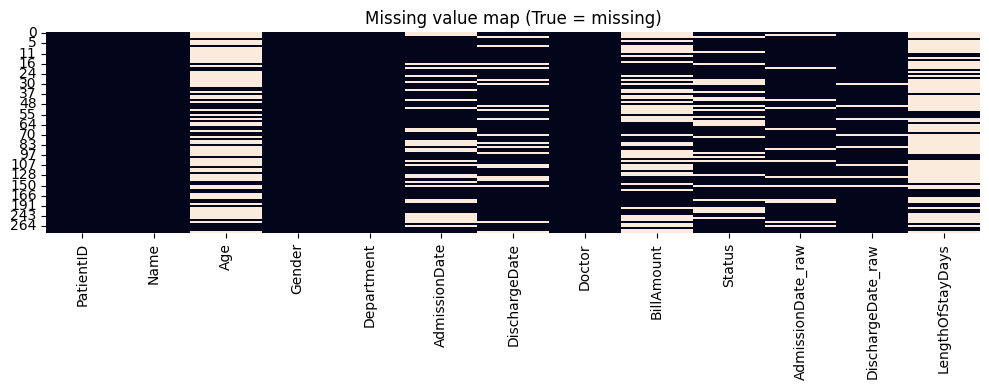

In [ ]:
plt.figure(figsize=(10,4))
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing value map (True = missing)")
plt.tight_layout()
plt.show()

Univariate analysis: numeric & categorical plots

In [ ]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Numeric columns:", numeric_cols)
print("Categorical columns:", cat_cols)

Numeric columns: ['PatientID', 'Age', 'BillAmount', 'LengthOfStayDays']
Categorical columns: ['Name', 'Gender', 'Department', 'Doctor', 'Status', 'AdmissionDate_raw', 'DischargeDate_raw']


Numeric histograms

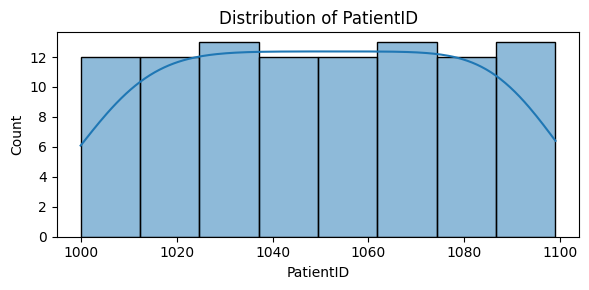

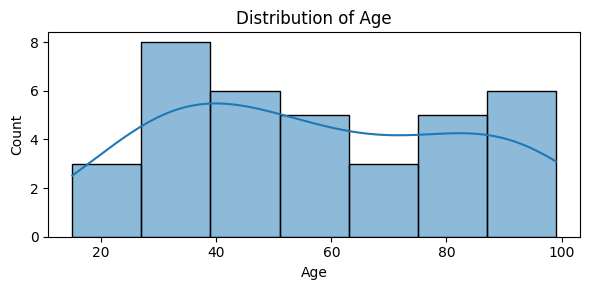

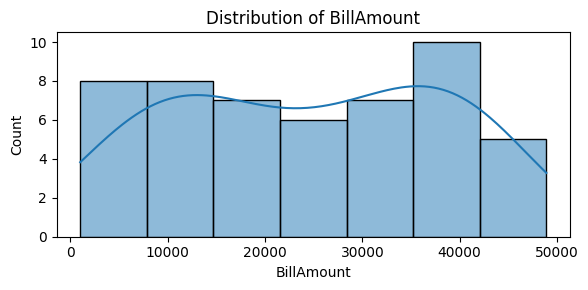

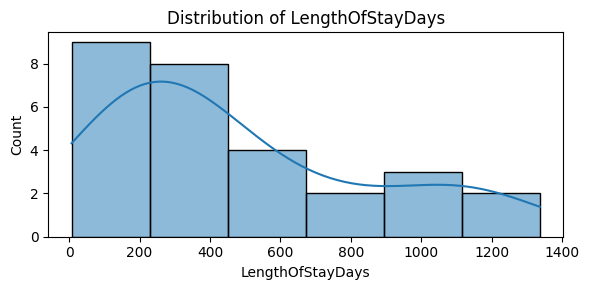

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

Boxplots for numeric

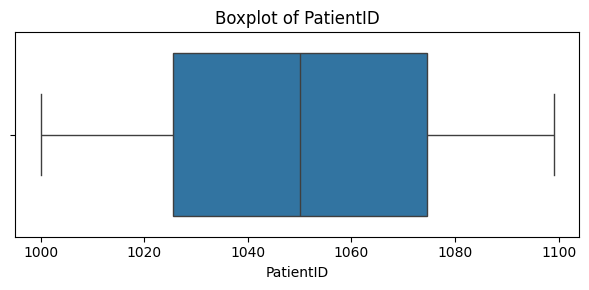

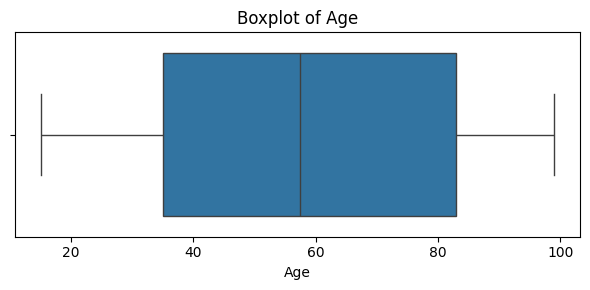

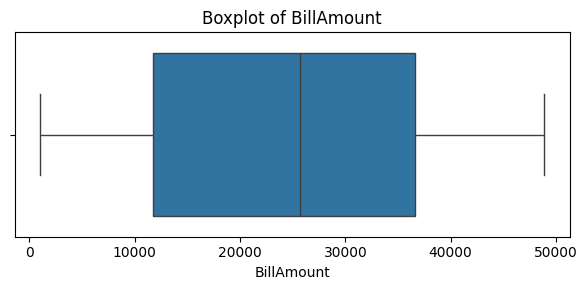

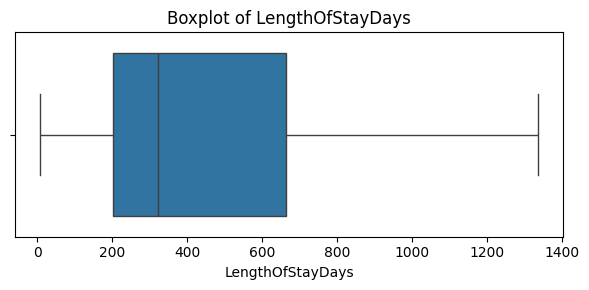

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

 Categorical countplots top categories

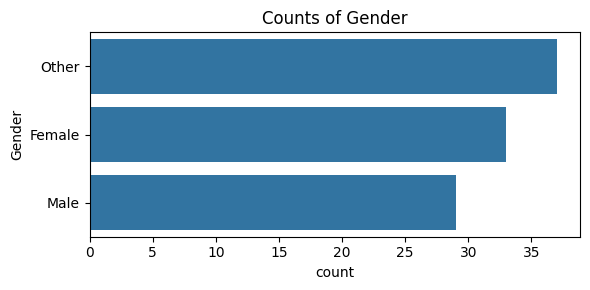

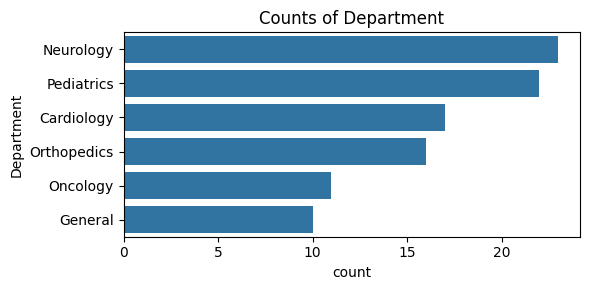

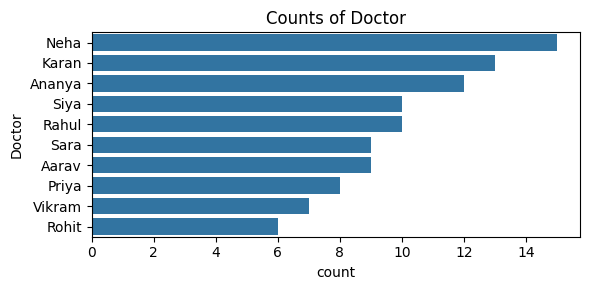

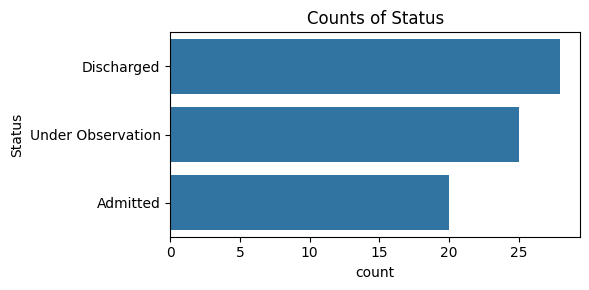

In [ ]:
for col in ['Gender', 'Department', 'Doctor', 'Status']:
    if col in df.columns:
        plt.figure(figsize=(6,3))
        sns.countplot(y=col, data=df, order=df[col].value_counts().index)
        plt.title(f"Counts of {col}")
        plt.tight_layout()
        plt.show()

Bivariate analysis & correlations

Correlation matrix for numeric features

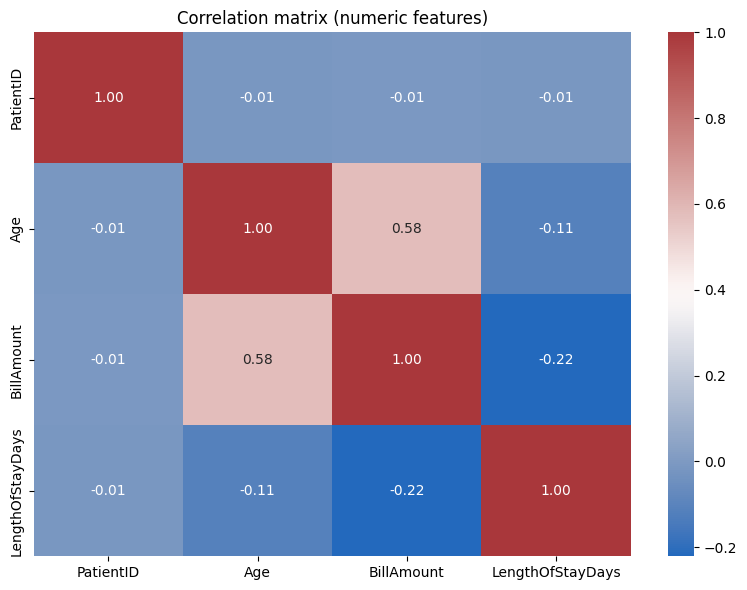

In [ ]:
if len(numeric_cols) > 1:
    plt.figure(figsize=(8,6))
    corr = df[numeric_cols].corr()
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="vlag")
    plt.title("Correlation matrix (numeric features)")
    plt.tight_layout()
    plt.show()

How BillAmount relates to Department/Status

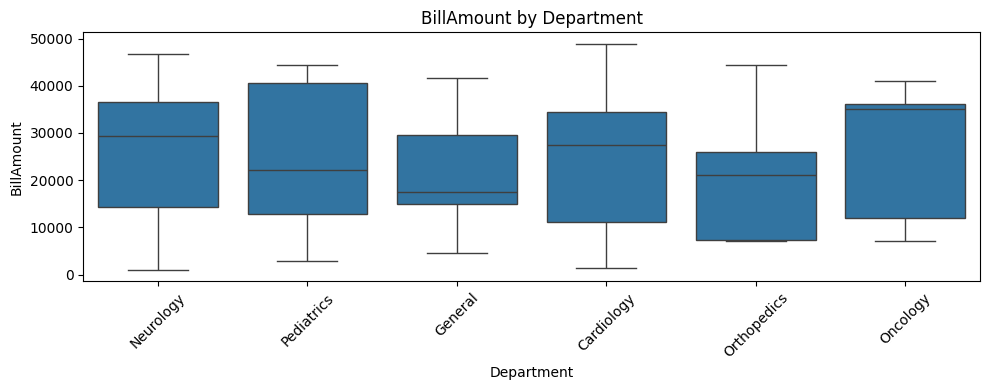

In [ ]:
if 'BillAmount' in df.columns and 'Department' in df.columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(x='Department', y='BillAmount', data=df)
    plt.xticks(rotation=45)
    plt.title("BillAmount by Department")
    plt.tight_layout()
    plt.show()

Status vs numeric variables

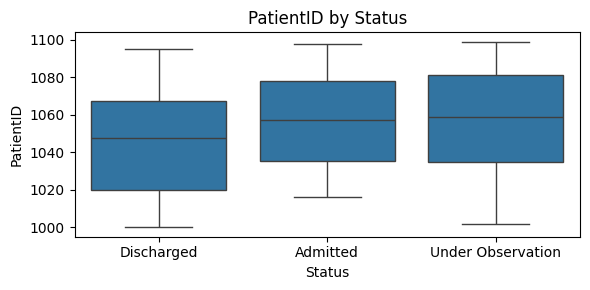

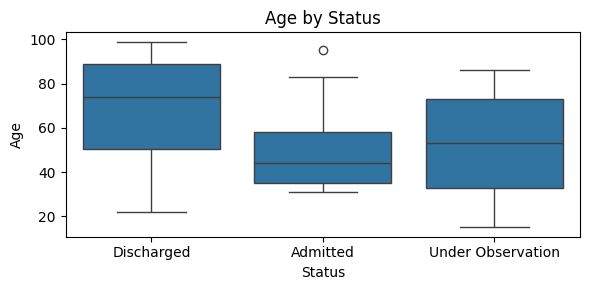

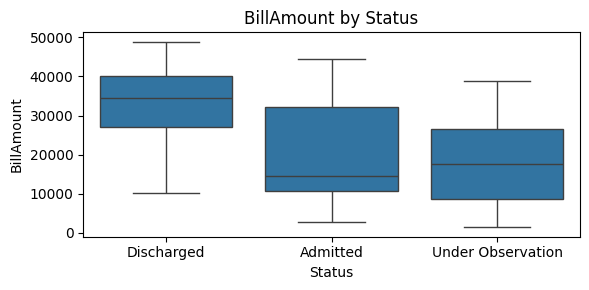

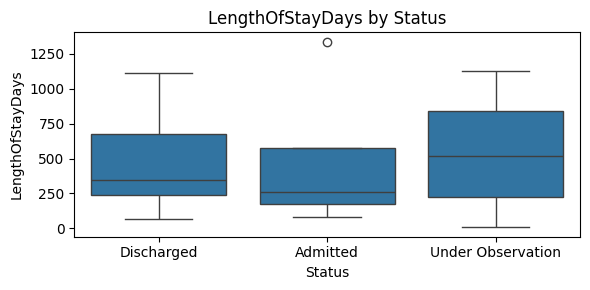

In [ ]:
if 'Status' in df.columns:
    for col in numeric_cols:
        plt.figure(figsize=(6,3))
        sns.boxplot(x='Status', y=col, data=df)
        plt.title(f"{col} by Status")
        plt.tight_layout()
        plt.show()


Handle missingness for modeling: simple strategies

In [ ]:
model_df = df.copy()

In [ ]:
target_class = 'Status' if 'Status' in model_df.columns else None
target_reg = 'BillAmount' if 'BillAmount' in model_df.columns else None

drop rows where Status is none for classification

In [ ]:
if target_class:
    model_df[target_class] = model_df[target_class].astype(str).replace({'nan': np.nan})
    print("Status value counts:\n", model_df[target_class].value_counts(dropna=False))
    model_df_clf = model_df[model_df[target_class].notna()].copy()
else:
    model_df_clf = None

Status value counts:
 Status
Discharged           28
NaN                  26
Under Observation    25
Admitted             20
Name: count, dtype: int64


regression target BillAmount prepare dataset with known bill amounts

In [ ]:
if target_reg:
    model_df_reg = model_df[model_df[target_reg].notna()].copy()
else:
    model_df_reg = None


In [ ]:
candidate_features = []
for c in ['Age','Gender','Department','Doctor','LengthOfStayDays','PatientID']:
    if c in model_df.columns:
        candidate_features.append(c)
print("Candidate features:", candidate_features)

Candidate features: ['Age', 'Gender', 'Department', 'Doctor', 'LengthOfStayDays', 'PatientID']


 Simple classification pipeline- Predicting Status

In [ ]:
sparse_output=False


In [ ]:
if model_df_clf is not None and model_df_clf.shape[0] >= 30:
    print("\n--- Classification: predicting Status ---")
    X = model_df_clf[candidate_features].copy()
    y = model_df_clf[target_class].copy()

    # Drop PatientID from features if present
    if 'PatientID' in X.columns:
        X = X.drop(columns=['PatientID'])

    # preprocessing: numeric impute, categorical encode
    numeric_feats = X.select_dtypes(include=[np.number]).columns.tolist()
    cat_feats = X.select_dtypes(include=['object', 'category']).columns.tolist()

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

 #Replace sparse=False with sparse_output=False
    cat_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_feats),
        ('cat', cat_transformer, cat_feats)
    ])

    clf_pipeline = Pipeline(steps=[
        ('pre', preprocessor),
        ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
    ])

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, stratify=y, test_size=0.2, random_state=42
    )

    print("Training classification pipeline...")
    clf_pipeline.fit(X_train, y_train)

    y_pred = clf_pipeline.predict(X_test)

    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    joblib.dump(clf_pipeline, "status_classifier_omkar.joblib")
    print("Saved classifier to status_classifier_omkar.joblib")

else:
    print("\nNot enough/valid rows for classification modeling or 'Status' missing.")



--- Classification: predicting Status ---
Training classification pipeline...
Accuracy: 0.4666666666666667
Classification Report:
                   precision    recall  f1-score   support

         Admitted       0.50      0.75      0.60         4
       Discharged       0.50      0.33      0.40         6
Under Observation       0.40      0.40      0.40         5

         accuracy                           0.47        15
        macro avg       0.47      0.49      0.47        15
     weighted avg       0.47      0.47      0.45        15

Confusion Matrix:
 [[3 0 1]
 [2 2 2]
 [1 2 2]]
Saved classifier to status_classifier_omkar.joblib


simple regression pipeline- predict BillAmount

In [ ]:
if model_df_reg is not None and model_df_reg.shape[0] >= 30:
    print("\n--- Regression: predicting BillAmount ---")

    # features & target
    Xr = model_df_reg[candidate_features].copy()
    yr = model_df_reg[target_reg].copy()

    # Drop Patient id if present
    if 'PatientID' in Xr.columns:
        Xr = Xr.drop(columns=['PatientID'])

    # identify numeric & categorical columns
    numeric_feats_r = Xr.select_dtypes(include=[np.number]).columns.tolist()
    cat_feats_r = Xr.select_dtypes(include=['object', 'category']).columns.tolist()

    # Numeric preprocessing
    numeric_transformer_r = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])

    # Categorical preprocessing
    cat_transformer_r = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    # combine preprocessing
    preprocessor_r = ColumnTransformer(transformers=[
        ('num', numeric_transformer_r, numeric_feats_r),
        ('cat', cat_transformer_r, cat_feats_r)
    ])

    # full regression pipeline
    reg_pipeline = Pipeline(steps=[
        ('pre', preprocessor_r),
        ('reg', RandomForestRegressor(n_estimators=100, random_state=42))
    ])

    # Train test split
    Xr_train, Xr_test, yr_train, yr_test = train_test_split(
        Xr, yr, test_size=0.2, random_state=42
    )

    print("Training regression pipeline...")
    reg_pipeline.fit(Xr_train, yr_train)

    # Predictions
    yr_pred = reg_pipeline.predict(Xr_test)

    # Evaluation
    print("MAE:", mean_absolute_error(yr_test, yr_pred))
    print("MSE:", mean_squared_error(yr_test, yr_pred))
    print("RMSE:", np.sqrt(mean_squared_error(yr_test, yr_pred)))
    print("R² Score:", r2_score(yr_test, yr_pred))

    joblib.dump(reg_pipeline, "billamount_regressor_omkar.joblib")
    print("Saved regressor to billamount_regressor_omkar.joblib")

else:
    print("\nNot enough/valid rows for regression modeling or 'BillAmount' missing.")



--- Regression: predicting BillAmount ---
Training regression pipeline...
MAE: 12894.482445454543
MSE: 205429325.93586347
RMSE: 14332.805933796197
R² Score: -0.28009810690216885
Saved regressor to billamount_regressor_omkar.joblib


Quick feature importance Random Forest used

In [ ]:
try:
    if 'clf' in clf_pipeline.named_steps and isinstance(clf_pipeline.named_steps['clf'], RandomForestClassifier):
        # Get transformed feature names
        num_feats = numeric_feats
        cat_feats = clf_pipeline.named_steps['pre'].transformers_[1][2] if len(clf_pipeline.named_steps['pre'].transformers_)>1 else []
        # Hard to map OneHot names without specialized code here; we will skip mapping and just show feature importance of transformer output indices
        importances = clf_pipeline.named_steps['clf'].feature_importances_
        print("Classifier feature importances (by transformed feature index):", importances[:10])
except Exception:
    pass

Classifier feature importances (by transformed feature index): [0.17067756 0.15633086 0.04975134 0.04011616 0.05924577 0.0331543
 0.0229477  0.04198409 0.03488702 0.03290232]


Save cleaned dataframe

In [ ]:
cleaned_filename = "hospital_data_cleaned_omkar.csv"
df.to_csv(cleaned_filename, index=False)
print(f"Saved cleaned dataset to {cleaned_filename}")


Saved cleaned dataset to hospital_data_cleaned_omkar.csv


In [ ]:
print("\n--- DONE ---")
print("Artifacts produced (in working directory):")
for f in os.listdir('.'):
    if f.endswith(".joblib") or f.endswith(".csv") or f.endswith(".py"):
        print(" -", f)



--- DONE ---
Artifacts produced (in working directory):
 - hospital_data_cleaned_omkar.csv
 - status_classifier_omkar.joblib
 - billamount_regressor_omkar.joblib
